In [1]:
%load_ext dotenv
%dotenv ../src/.env
import sys
sys.path.append("../src")
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [4]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
36063,MMM,2012-12-17,92.389999,93.110001,92.129997,93.029999,64.537102,2750700,Industrials,Industrial Conglomerates,2012,92.279999,0.008127,1,1.0
19144,ABT,2018-03-06,60.590000,61.020000,60.110001,60.880001,54.971546,6620000,Health Care,Health Care Equipment,2018,60.369999,0.008448,1,1.0
32070,AFL,2021-03-30,51.580002,52.090000,51.299999,51.830002,48.205086,2687200,Financials,Life & Health Insurance,2021,51.340000,0.009544,1,0.0
31866,AFL,2020-06-08,41.279999,42.189999,41.080002,42.099998,38.339626,4033600,Financials,Life & Health Insurance,2020,40.529999,0.038737,1,0.0
25779,AOS,2020-05-22,42.810001,42.810001,41.900002,42.220001,39.472816,1103500,Industrials,Building Products,2020,42.680000,-0.010778,0,1.0


In [5]:
simple_sample_dt = df.sample(frac = 0.1)
simple_sample_dt.shape, df.shape

((5104, 15), (51035, 15))

Look at the distribution of tickers.

<Axes: >

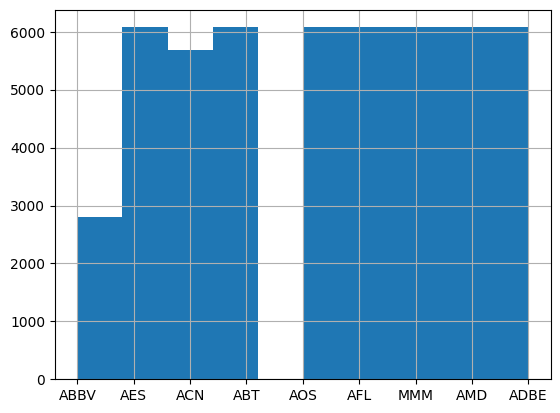

In [6]:
df['ticker'].hist()

<Axes: >

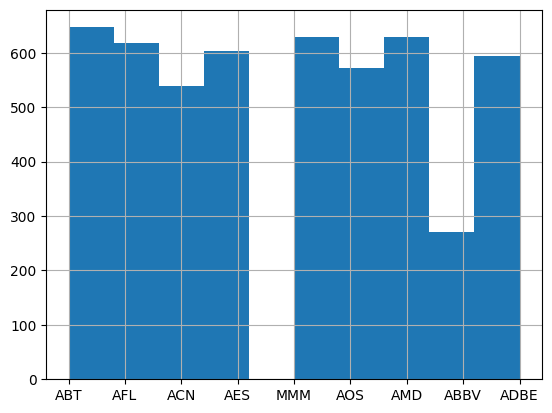

In [7]:
simple_sample_dt['ticker'].hist()

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: >

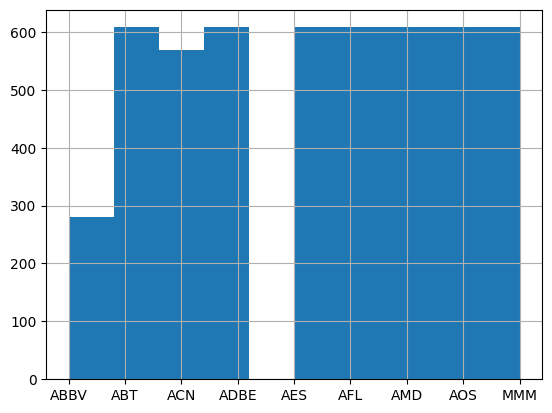

In [8]:
strat_sample_dt = df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].hist()

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\JesusCalderon\AppData\Local\Temp\ipykernel_41380\3864709739.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  .apply(lambda x: x.sample(frac = 0.1)).compute())


<Axes: >

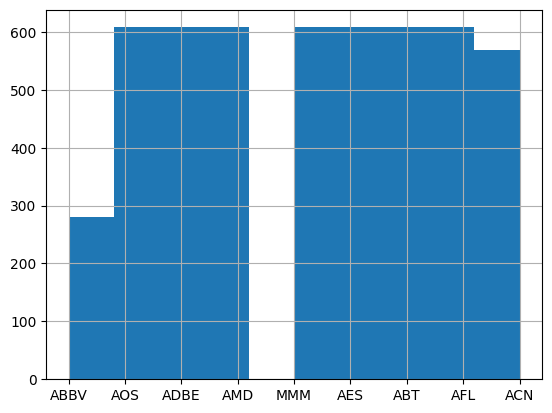

In [9]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1)).compute())
strat_sample_dd_dt.reset_index()['ticker'].hist()